In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import yfinance as yf 

In [10]:
# import data from yahoo finance 

data_new = yf.download(start="2007-01-01", end="2022-08-01", interval="1d", tickers=['YM=F', 'NQ=F', 'YM=F', 'NQ=F', 'ES=F', 'RTY=F', 'CL=F', 'GC=F', 'SI=F', 'NG=F','^GSPC', 'EURUSD=X', '^TNX'])

# 'YM=F' is the S&P 500 index 
# 'NQ=F' is the NASDAQ index 
# 'ES=F' is the EURO STOX index 
# 'RTY=F' is the Russell 2000 index 
# 'CL=F' is the Crude Oil index 
# 'GC=F' is the Gold index 
# 'SI=F' is the Silver index 
# 'NG=F' is the Natural Gas index 
# '^GSPC' is the S&P 500 index
# 'EURUSD=X' is the EURO/USD index 
# '^TNX' is the 10-year Treasury note index 



[*********************100%***********************]  11 of 11 completed


In [25]:
data =  yf.download(start="2000-01-01", end="2022-08-01", interval="1d", tickers=['YM=F'])

[*********************100%***********************]  1 of 1 completed


In [40]:
data.index[200:]

DatetimeIndex(['2003-01-21', '2003-01-22', '2003-01-23', '2003-01-24',
               '2003-01-27', '2003-01-28', '2003-01-29', '2003-01-30',
               '2003-01-31', '2003-02-03',
               ...
               '2022-07-18', '2022-07-19', '2022-07-20', '2022-07-21',
               '2022-07-22', '2022-07-25', '2022-07-26', '2022-07-27',
               '2022-07-28', '2022-07-29'],
              dtype='datetime64[ns]', name='Date', length=4917, freq=None)

In [50]:
data['Close_MA200'] = data['Close'].rolling(window=200).mean()
data['Close_MA100'] = data['Close'].rolling(window=100).mean()
data['Close_MA50'] = data['Close'].rolling(window=50).mean()
data['Close_MA25'] = data['Close'].rolling(window=25).mean()

data['Close_MA200'].fillna(0, inplace=True)
data['Close_MA100'].fillna(0, inplace=True)
data['Close_MA50'].fillna(0, inplace=True)
data['Close_MA25'].fillna(0, inplace=True)



In [51]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Close_MA',
       'Close_MA200', 'Close_MA100', 'Close_MA50', 'Close_MA25'],
      dtype='object')

<AxesSubplot:xlabel='Date'>

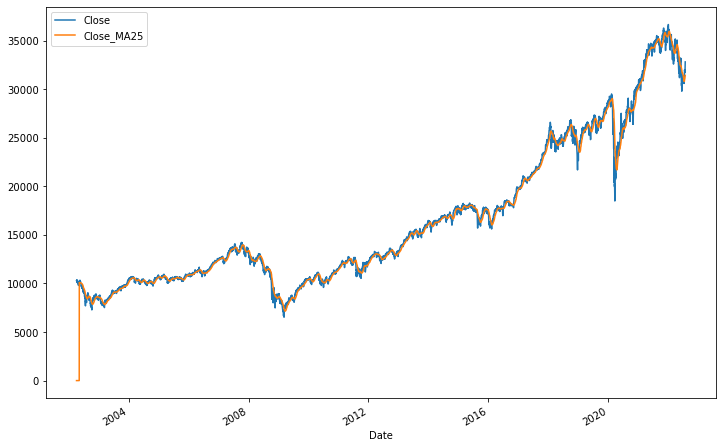

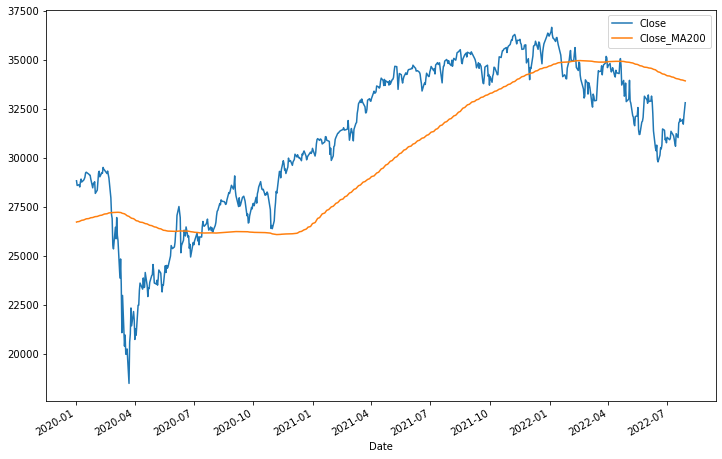

In [55]:
data[['Close','Close_MA25']].plot(figsize=(12,8))
data[data.index > '2020-01-01'][['Close','Close_MA200']].plot(figsize=(12,8))

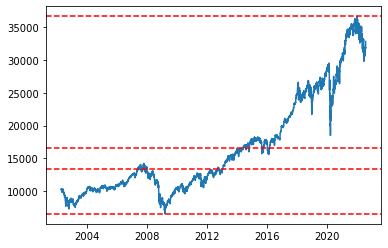

In [38]:
plt.plot(data['Close'])
plt.axhline(data['Close'].min(), color='r', linestyle='--')
plt.axhline(data['Close'].max(), color='r', linestyle='--')
plt.axhline(data['Close'].median(), color='r', linestyle='--')
plt.axhline(data['Close'].mean(), color='r', linestyle='--')


# plt.axhline(data['Close'].max())
    

In [11]:
# change Tickers names to readable names 
data_new = data_new.stack().reset_index().rename(columns={'level_1':'Ticker'})
data_new['Ticker'] = data_new['Ticker'].map({'YM=F':'S&P 500', 'NQ=F':'NASDAQ', 'ES=F':'EURO STOX', 'RTY=F':'Russell 2000', 'CL=F':'Crude Oil', 'GC=F':'Gold', 'SI=F':'Silver', 'NG=F':'Natural Gas', '^GSPC':'S&P 500', 'EURUSD=X':'EURO/USD', '^TNX':'10-year Treasury note'})
data_new['Date'] = pd.to_datetime(data_new['Date'])

In [12]:
data_new.head()

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2007-01-01,EURO/USD,1.321895,1.321895,1.321999,1.317593,1.319801,0.0
1,2007-01-02,Crude Oil,61.049999,61.049999,61.549999,60.410000,60.980000,41686.0
2,2007-01-02,EURO/USD,1.327598,1.327598,1.329398,1.321755,1.321895,0.0
3,2007-01-02,Gold,635.200012,635.200012,635.200012,635.200012,635.200012,17.0
4,2007-01-02,Natural Gas,6.299000,6.299000,6.309000,6.100000,6.205000,4729.0


In [13]:
data_new.shape

(40599, 8)

In [14]:
data_new[data_new['Ticker'] == 'S&P 500'].shape

(7842, 8)

<AxesSubplot:xlabel='Date', ylabel='Close'>

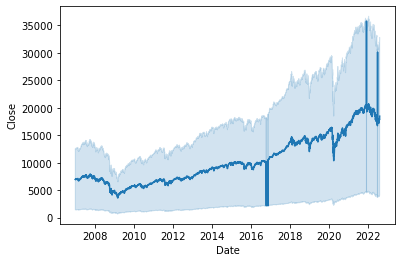

In [15]:
# plot each ticket close price
# data_new[data_new['Ticker'] == 'S&P 500'].plot(x='Date', y='Close', figsize=(12,6))
sns.lineplot(x='Date', y='Close', data=data_new[data_new['Ticker'] == 'S&P 500'])